# Análise da Rotatividade do Churn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Os 5 Primeiros

In [5]:
import pandas as pd
df = pd.read_excel('rotatividade_dos_clientes.xlsx')
print(df.head())

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

### Os 5 Últimos

In [7]:
print(df.tail())

      CustomerID  Count        Country       State          City  Zip Code  \
7038  2569-WGERO      1  United States  California       Landers     92285   
7039  6840-RESVB      1  United States  California      Adelanto     92301   
7040  2234-XADUH      1  United States  California         Amboy     92304   
7041  4801-JZAZL      1  United States  California  Angelus Oaks     92305   
7042  3186-AJIEK      1  United States  California  Apple Valley     92308   

                    Lat Long   Latitude   Longitude  Gender  ...  \
7038  34.341737, -116.539416  34.341737 -116.539416  Female  ...   
7039  34.667815, -117.536183  34.667815 -117.536183    Male  ...   
7040  34.559882, -115.637164  34.559882 -115.637164  Female  ...   
7041     34.1678, -116.86433  34.167800 -116.864330  Female  ...   
7042  34.424926, -117.184503  34.424926 -117.184503    Male  ...   

            Contract Paperless Billing             Payment Method  \
7038        Two year               Yes  Bank transfer

### Info das Colunas

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [11]:
print(df.shape)

(7043, 33)


### Descrição das Medidas Estatísticas

In [13]:
print(df.describe())

        Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Total Charges  Churn Value  Churn Score         CLTV  
count      7043.000000    7032.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692    2283.300441     0.265370    58.699418  4400.295755  
std          30.090047    2266.771362     0.441561    21.525131  1183.057152  
min          18.250000      18.8000

In [15]:
print(df.isnull())

      CustomerID  Count  Country  State   City  Zip Code  Lat Long  Latitude  \
0          False  False    False  False  False     False     False     False   
1          False  False    False  False  False     False     False     False   
2          False  False    False  False  False     False     False     False   
3          False  False    False  False  False     False     False     False   
4          False  False    False  False  False     False     False     False   
...          ...    ...      ...    ...    ...       ...       ...       ...   
7038       False  False    False  False  False     False     False     False   
7039       False  False    False  False  False     False     False     False   
7040       False  False    False  False  False     False     False     False   
7041       False  False    False  False  False     False     False     False   
7042       False  False    False  False  False     False     False     False   

      Longitude  Gender  ...  Contract 

In [17]:
print(df.dropna())

      CustomerID  Count        Country       State          City  Zip Code  \
0     3668-QPYBK      1  United States  California   Los Angeles     90003   
1     9237-HQITU      1  United States  California   Los Angeles     90005   
2     9305-CDSKC      1  United States  California   Los Angeles     90006   
3     7892-POOKP      1  United States  California   Los Angeles     90010   
4     0280-XJGEX      1  United States  California   Los Angeles     90015   
...          ...    ...            ...         ...           ...       ...   
1864  1699-HPSBG      1  United States  California  Palm Springs     92264   
1865  8775-CEBBJ      1  United States  California        Seeley     92273   
1866  6894-LFHLY      1  United States  California         Vidal     92280   
1867  0639-TSIQW      1  United States  California   White Water     92282   
1868  8361-LTMKD      1  United States  California  Apple Valley     92307   

                    Lat Long   Latitude   Longitude  Gender  ..

In [19]:
print(df.sort_values('Monthly Charges', ascending=True))

      CustomerID  Count        Country       State           City  Zip Code  \
4613  6823-SIDFQ      1  United States  California     Parker Dam     92267   
2997  9764-REAFF      1  United States  California      Stonyford     95979   
6758  0827-ITJPH      1  United States  California    Los Angeles     90047   
6945  9945-PSVIP      1  United States  California        Dulzura     91917   
2725  0621-CXBKL      1  United States  California   Copperopolis     95228   
...          ...    ...            ...         ...            ...       ...   
1347  8199-ZLLSA      1  United States  California        Tujunga     91042   
5417  5734-EJKXG      1  United States  California  Goodyears Bar     95944   
4736  5989-AXPUC      1  United States  California   Garden Grove     92840   
3422  8984-HPEMB      1  United States  California    Lytle Creek     92358   
5251  7569-NMZYQ      1  United States  California     Middletown     95461   

                    Lat Long   Latitude   Longitude

In [21]:
print(df.sort_values('Monthly Charges', ascending=False))

      CustomerID  Count        Country       State           City  Zip Code  \
5251  7569-NMZYQ      1  United States  California     Middletown     95461   
3422  8984-HPEMB      1  United States  California    Lytle Creek     92358   
5417  5734-EJKXG      1  United States  California  Goodyears Bar     95944   
4736  5989-AXPUC      1  United States  California   Garden Grove     92840   
1347  8199-ZLLSA      1  United States  California        Tujunga     91042   
...          ...    ...            ...         ...            ...       ...   
2725  0621-CXBKL      1  United States  California   Copperopolis     95228   
6945  9945-PSVIP      1  United States  California        Dulzura     91917   
6758  0827-ITJPH      1  United States  California    Los Angeles     90047   
2997  9764-REAFF      1  United States  California      Stonyford     95979   
4613  6823-SIDFQ      1  United States  California     Parker Dam     92267   

                    Lat Long   Latitude   Longitude

In [23]:
print(df.sort_values('Total Charges', ascending=True))

      CustomerID  Count        Country       State         City  Zip Code  \
3087  2967-MXRAV      1  United States  California  Los Angeles     90003   
1710  9318-NKNFC      1  United States  California        Twain     95984   
2720  8992-CEUEN      1  United States  California       Arnold     95223   
5518  9975-SKRNR      1  United States  California  Sierraville     96126   
2306  1423-BMPBQ      1  United States  California      Anaheim     92808   
...          ...    ...            ...         ...          ...       ...   
4687  3213-VVOLG      1  United States  California     Sun City     92585   
5104  2520-SGTTA      1  United States  California   Ben Lomond     95005   
5719  2923-ARZLG      1  United States  California     La Verne     91750   
6772  4075-WKNIU      1  United States  California         Bell     90201   
6840  2775-SEFEE      1  United States  California   Wilmington     90744   

                    Lat Long   Latitude   Longitude  Gender  ...  \
3087  3

In [25]:
print(df.sort_values('Total Charges', ascending=False))

      CustomerID  Count        Country       State           City  Zip Code  \
1206  2889-FPWRM      1  United States  California  Mckinleyville     95519   
5251  7569-NMZYQ      1  United States  California     Middletown     95461   
6850  9739-JLPQJ      1  United States  California     Long Beach     90822   
5814  9788-HNGUT      1  United States  California        Cabazon     92230   
3478  8879-XUAHX      1  United States  California         Irvine     92614   
...          ...    ...            ...         ...            ...       ...   
4687  3213-VVOLG      1  United States  California       Sun City     92585   
5104  2520-SGTTA      1  United States  California     Ben Lomond     95005   
5719  2923-ARZLG      1  United States  California       La Verne     91750   
6772  4075-WKNIU      1  United States  California           Bell     90201   
6840  2775-SEFEE      1  United States  California     Wilmington     90744   

                    Lat Long   Latitude   Longitude

In [27]:
print(df.sort_values('Churn Score', ascending=True))

      CustomerID  Count        Country       State          City  Zip Code  \
2148  7156-MXBJE      1  United States  California     San Diego     92127   
2055  4522-AKYLR      1  United States  California   Chino Hills     91709   
2054  9058-HRZSV      1  United States  California  Baldwin Park     91706   
1991  7554-NEWDD      1  United States  California    Long Beach     90815   
1975  3146-MSEGF      1  United States  California     Paramount     90723   
...          ...    ...            ...         ...           ...       ...   
1166  3178-FESZO      1  United States  California      Clements     95227   
780   7613-LLQFO      1  United States  California   Amador City     95601   
151   1009-IRMNA      1  United States  California  Port Hueneme     93041   
1322  8943-URTMR      1  United States  California      Lawndale     90260   
439   5364-XYIRR      1  United States  California   Los Angeles     90013   

                    Lat Long   Latitude   Longitude  Gender  ..

In [29]:
print(df.sort_values('Churn Score', ascending=False))

      CustomerID  Count        Country       State          City  Zip Code  \
780   7613-LLQFO      1  United States  California   Amador City     95601   
1320  6101-IMRMM      1  United States  California    El Segundo     90245   
1081  9189-JWSHV      1  United States  California          Helm     93627   
100   0533-BNWKF      1  United States  California   Palm Desert     92211   
1322  8943-URTMR      1  United States  California      Lawndale     90260   
...          ...    ...            ...         ...           ...       ...   
1975  3146-MSEGF      1  United States  California     Paramount     90723   
1991  7554-NEWDD      1  United States  California    Long Beach     90815   
2054  9058-HRZSV      1  United States  California  Baldwin Park     91706   
2055  4522-AKYLR      1  United States  California   Chino Hills     91709   
2148  7156-MXBJE      1  United States  California     San Diego     92127   

                    Lat Long   Latitude   Longitude  Gender  ..

In [31]:
print(df.sort_values('CLTV', ascending=True))

      CustomerID  Count        Country       State           City  Zip Code  \
4158  6860-YRJZP      1  United States  California     Sacramento     95820   
1162  4925-LMHOK      1  United States  California       Stockton     95212   
1615  0871-URUWO      1  United States  California    Sheep Ranch     95250   
4430  0247-SLUJI      1  United States  California         Duarte     91010   
3576  7928-VJYAB      1  United States  California        Lemoore     93245   
...          ...    ...            ...         ...            ...       ...   
3446  8894-JVDCV      1  United States  California      Riverside     92505   
3600  2683-JXWQQ      1  United States  California        Visalia     93291   
2550  6024-RUGGH      1  United States  California  San Francisco     94112   
6202  0383-CLDDA      1  United States  California       Stanford     94305   
3482  7622-FWGEW      1  United States  California     Costa Mesa     92626   

                    Lat Long   Latitude   Longitude

In [33]:
print(df.sort_values('CLTV', ascending=False))

      CustomerID  Count        Country       State           City  Zip Code  \
3482  7622-FWGEW      1  United States  California     Costa Mesa     92626   
2550  6024-RUGGH      1  United States  California  San Francisco     94112   
6202  0383-CLDDA      1  United States  California       Stanford     94305   
3600  2683-JXWQQ      1  United States  California        Visalia     93291   
6839  4114-QMKVN      1  United States  California       Surfside     90743   
...          ...    ...            ...         ...            ...       ...   
6724  4657-FWVFY      1  United States  California    Kings Beach     96143   
3576  7928-VJYAB      1  United States  California        Lemoore     93245   
4158  6860-YRJZP      1  United States  California     Sacramento     95820   
1162  4925-LMHOK      1  United States  California       Stockton     95212   
1615  0871-URUWO      1  United States  California    Sheep Ranch     95250   

                    Lat Long   Latitude   Longitude

In [35]:
print(df['Monthly Charges'].min())

18.25


In [37]:
print(df['Monthly Charges'].max())

118.75


In [39]:
print(df['Total Charges'].min())

18.8


In [41]:
print(df['Total Charges'].max())

8684.8


In [43]:
print(df['Churn Score'].min())

5


In [45]:
print(df['Churn Score'].max())

100


In [47]:
print(df['CLTV'].min())

2003


In [49]:
print(df['CLTV'].max())

6500


### Contagem dos Gêneros

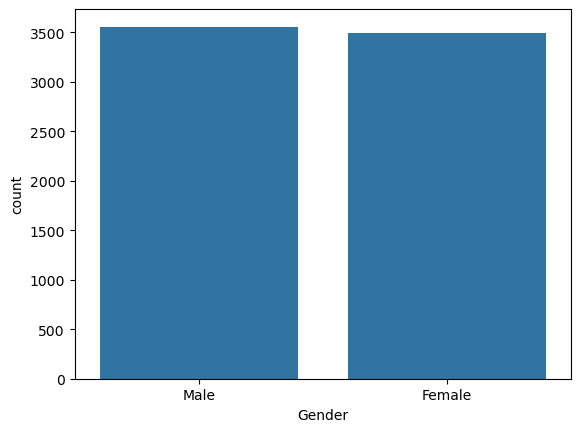

In [53]:
import seaborn as sns
sns.countplot(x = 'Gender', data = df)
plt.show()

### Contagem de se Alguns são Sêniores ou Não

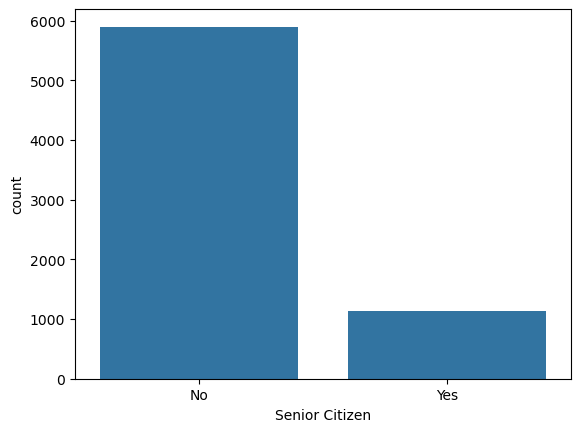

In [55]:
import seaborn as sns
sns.countplot(x = "Senior Citizen", data = df)
plt.show()

### Contagem dos Clientes que tem Parceiros ou Não

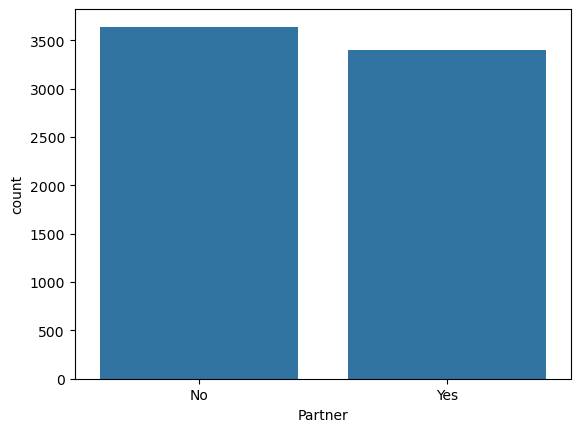

In [57]:
import seaborn as sns
sns.countplot(x = "Partner", data = df)
plt.show()

### Clientes que tem Dependentes ou Não

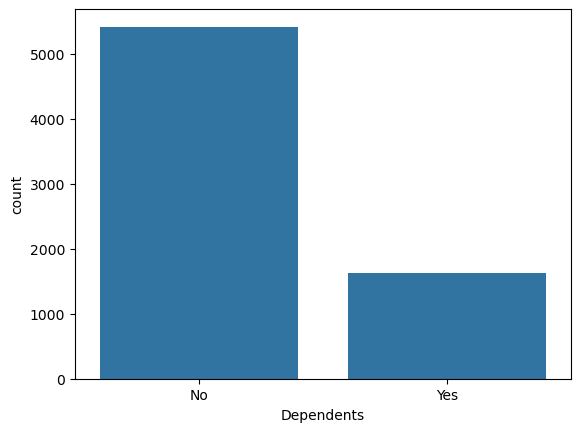

In [59]:
import seaborn as sns
sns.countplot(x = "Dependents", data = df)
plt.show()

### Serviço de Telefone (Se o cliente tem ou não)

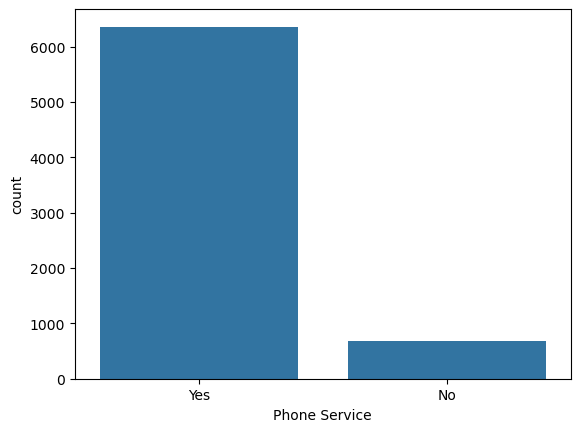

In [61]:
import seaborn as sns
sns.countplot(x = "Phone Service", data = df)
plt.show()

### Múltiplas Linhas (Se o cliente tem ou não)

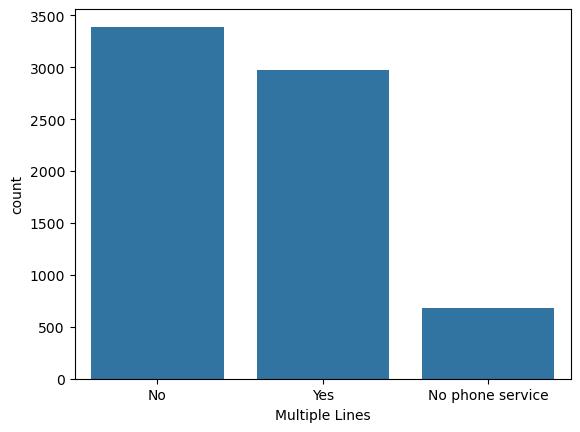

In [63]:
import seaborn as sns
sns.countplot(x = "Multiple Lines", data = df)
plt.show()

### Serviço de Internet (Se o cliente tem ou não)

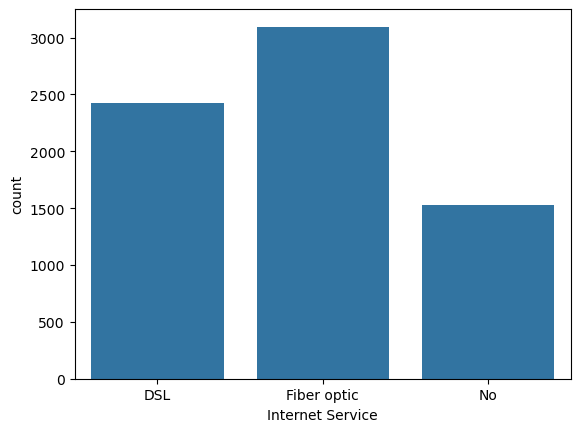

In [65]:
import seaborn as sns
sns.countplot(x = "Internet Service", data = df)
plt.show()

### Segurança Online (Se o cliente tem ou não)

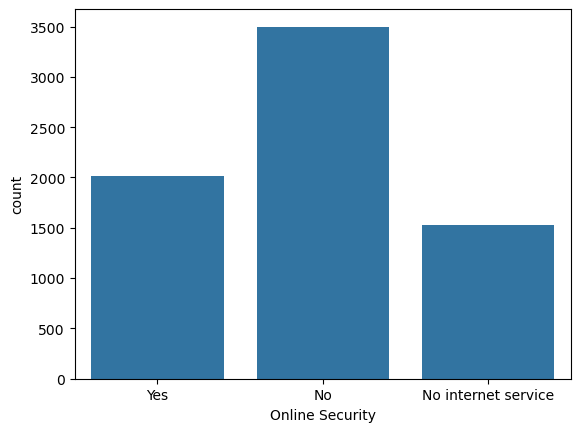

In [67]:
import seaborn as sns
sns.countplot(x = "Online Security", data = df)
plt.show()

### Serviço de Backup Online (Se os clientes tem ou não)

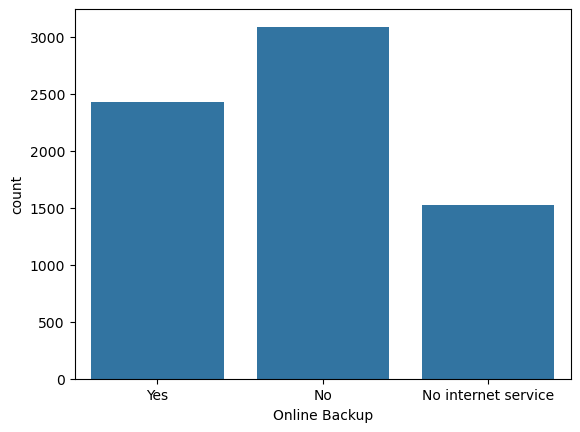

In [69]:
import seaborn as sns
sns.countplot(x = "Online Backup", data = df)
plt.show()

### Proteção do Dispositivo (Se os clientes aderiram ou não)

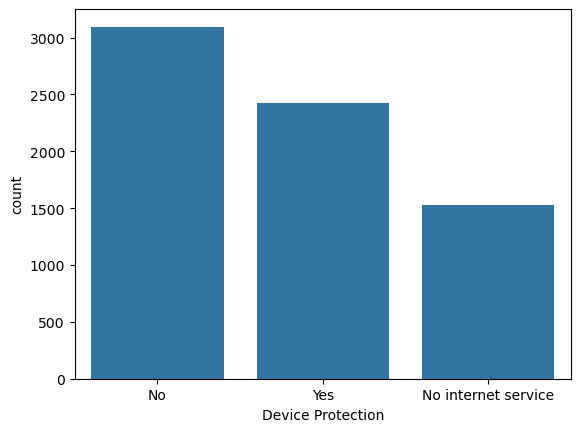

In [71]:
import seaborn as sns
sns.countplot(x = "Device Protection", data = df)
plt.show()

### Suporte Técnico (Se os clientes tem ou não)

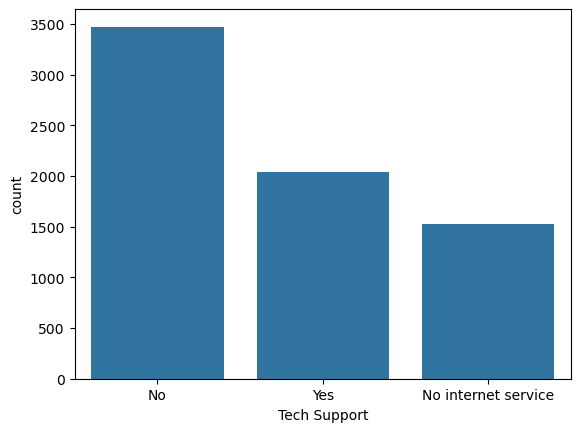

In [73]:
import seaborn as sns
sns.countplot(x = "Tech Support", data = df)
plt.show()

### Serviço de Streaming (TV) (Se os clientes tem ou não)

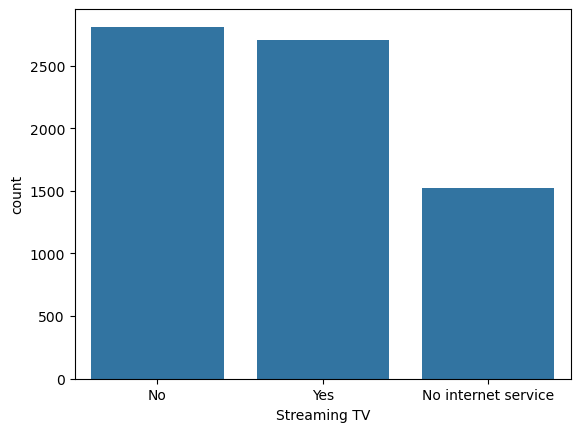

In [75]:
import seaborn as sns
sns.countplot(x = "Streaming TV", data = df)
plt.show()

### Serviço de Streaming (Filmes) (Se os clientes tem ou não)

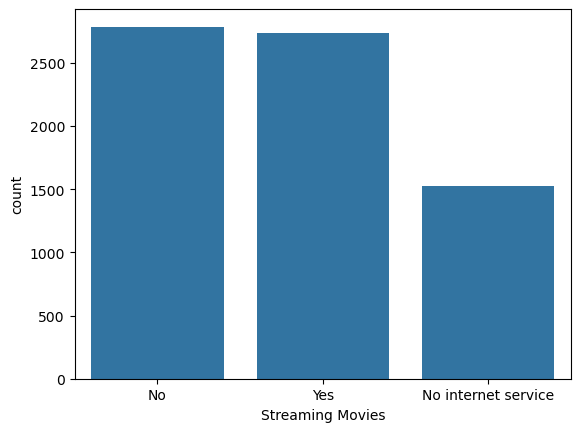

In [77]:
import seaborn as sns
sns.countplot(x = "Streaming Movies", data = df)
plt.show()

### Tipo de Contrato dos Clientes

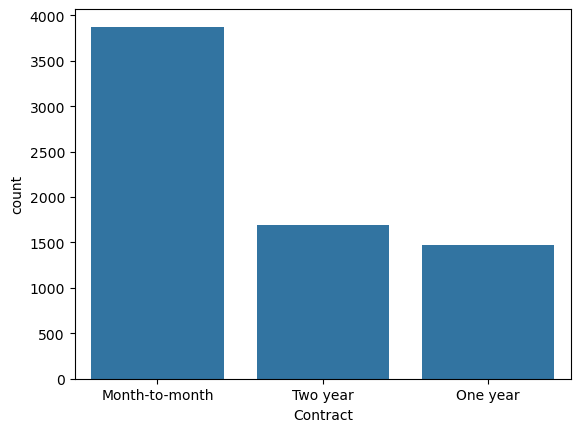

In [79]:
import seaborn as sns
sns.countplot(x = "Contract", data = df)
plt.show()

### Quem utiliza Fatura Eletrônica?

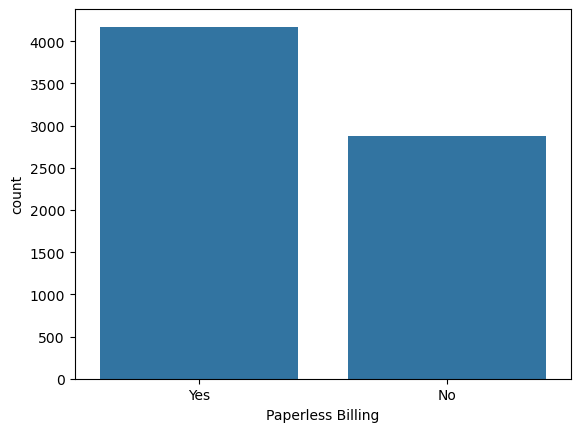

In [81]:
import seaborn as sns
sns.countplot(x = "Paperless Billing", data = df)
plt.show()

### Métodos de Pagamento

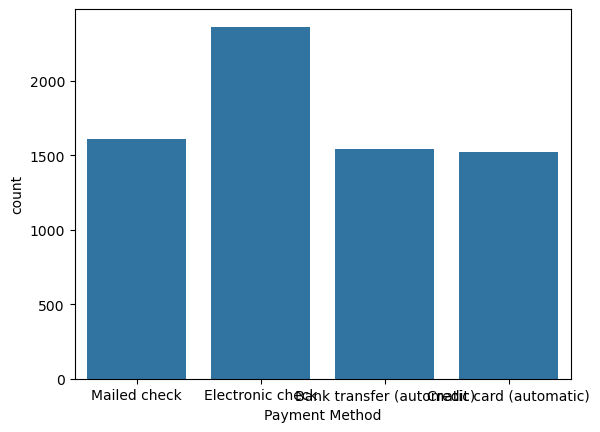

In [83]:
import seaborn as sns
sns.countplot(x = "Payment Method", data = df)
plt.show()

### Quem tem Churn ou Não?

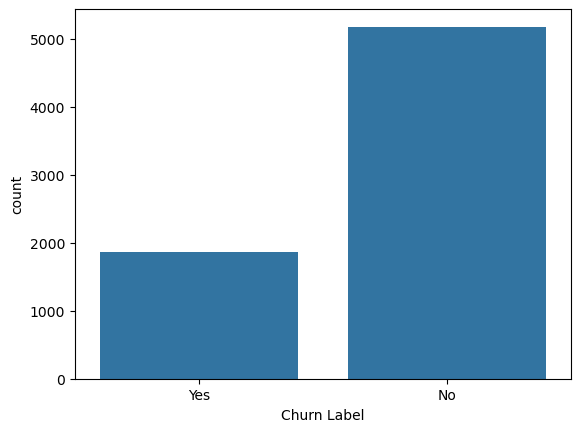

In [85]:
import seaborn as sns
sns.countplot(x = "Churn Label", data = df)
plt.show()

### Valor do Churn

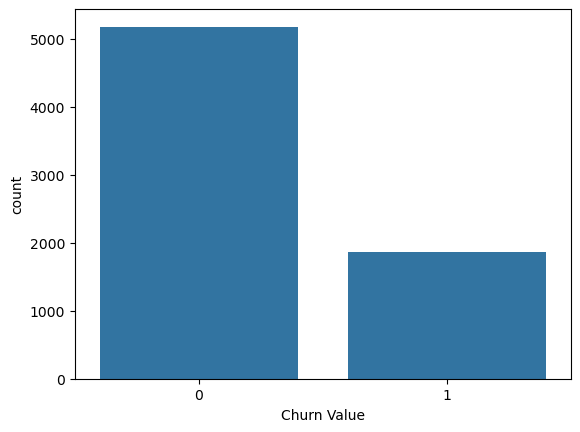

In [87]:
import seaborn as sns
sns.countplot(x = "Churn Value", data = df)
plt.show()